In [1]:
#Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.
#Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.
#Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

In [1]:
from pymystem3 import Mystem
import nltk
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import os
from string import punctuation
import nltk
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk.tokenize import word_tokenize
my_text = []





In [2]:
#Открываем текст, обрезаем пунктуацию, приводим к нижнему регистру
with open('Harry_Potter_and_the_Sorcerers_Stone.txt','r', encoding='utf-8') as f:
    for line in f:
        line = line.split()
        for word in line:
            my_text.append(word)
print(my_text[:100])
mytext = " ".join(my_text)
my_text1 = mytext.lower()
mtxt = my_text1.split()
clear_text = [w.strip(punctuation) for w in mtxt]
print(clear_text[:100])


['CHAPTER', 'ONE', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr.', 'and', 'Mrs.', 'Dursley,', 'of', 'number', 'four,', 'Privet', 'Drive,', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly', 'normal,', 'thank', 'you', 'very', 'much.', 'They', 'were', 'the', 'last', 'people', "you'd", 'expect', 'to', 'be', 'involved', 'in', 'anything', 'strange', 'or', 'mysterious,', 'because', 'they', 'just', "didn't", 'hold', 'with', 'such', 'nonsense.', 'Mr.', 'Dursley', 'was', 'the', 'director', 'of', 'a', 'firm', 'called', 'Grunnings,', 'which', 'made', 'drills.', 'He', 'was', 'a', 'big,', 'beefy', 'man', 'with', 'hardly', 'any', 'neck,', 'although', 'he', 'did', 'have', 'a', 'very', 'large', 'mustache.', 'Mrs.', 'Dursley', 'was', 'thin', 'and', 'blonde', 'and', 'had', 'nearly', 'twice', 'the', 'usual', 'amount', 'of', 'neck,', 'which', 'came', 'in']
['chapter', 'one', 'the', 'boy', 'who', 'lived', 'mr', 'and', 'mrs', 'dursley', 'of', 'number', 'four', 'privet', 'drive', 'were', 'proud', 'to', 

In [3]:
#лемматизация текста и запись в файл
with open ('Harry_Potter_lemmas.txt', 'w+', encoding = 'utf-8') as a:
    from nltk import WordNetLemmatizer
    wnl = WordNetLemmatizer()
    lem = ''
    for word in clear_text:
        ep = wnl.lemmatize(word, pos='v')
        lem += str(ep)
        lem += ' '
    a.write(lem)


print(lem[:500])

chapter one the boy who live mr and mrs dursley of number four privet drive be proud to say that they be perfectly normal thank you very much they be the last people you'd expect to be involve in anything strange or mysterious because they just didn't hold with such nonsense mr dursley be the director of a firm call grunnings which make drill he be a big beefy man with hardly any neck although he do have a very large mustache mrs dursley be thin and blonde and have nearly twice the usual amount 


In [11]:
#Вычисление абсолютной частоты и сортировка списка
counts = {}
lemma = list(lem.split( ))
for word in lemma:
    if word in counts:
        counts[word] += 1
    else:
        counts[word] = 1
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
print(sorted_counts[:100])
    

[('the', 3562), ('be', 2385), ('to', 1838), ('and', 1819), ('a', 1648), ('he', 1468), ('of', 1246), ('harry', 1143), ('have', 1032), ('in', 943), ('his', 933), ('say', 916), ('it', 894), ('you', 693), ('at', 621), ('on', 616), ('they', 569), ('that', 553), ('as', 520), ('him', 464), ('i', 461), ('get', 431), ('with', 412), ('ron', 396), ('but', 395), ('look', 372), ('for', 357), ('go', 357), ('out', 355), ('all', 352), ('up', 345), ('do', 310), ('them', 306), ('hagrid', 303), ('know', 265), ('what', 261), ('back', 252), ('hermione', 241), ('from', 240), ('think', 233), ('one', 232), ('there', 228), ('she', 220), ('if', 220), ('into', 219), ('their', 216), ('see', 216), ('about', 214), ('not', 209), ('this', 208), ('like', 201), ('an', 199), ('so', 196), ('off', 195), ("didn't", 192), ('could', 187), ('come', 180), ('when', 175), ('tell', 175), ('down', 173), ('her', 170), ('me', 170), ('over', 167), ('try', 167), ('take', 166), ('very', 165), ('just', 159), ('professor', 159), ('who', 

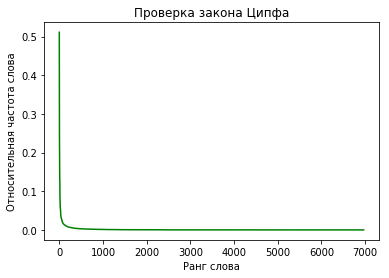

In [7]:
#Проверка закона Ципфа
c = 0
r = []
q = []
for line in sorted_counts:
    c += 1
    r.append(c)
    q.append(line[1]/len(sorted_counts))
plt.title("Проверка закона Ципфа")
plt.xlabel('Ранг слова')
plt.ylabel('Относительная частота слова')
plt.plot(r, q, c = 'green')
plt.show()


In [10]:
#Очистим текст от стоп-слов
sw = stopwords.words('english')
filtered = [w for w in lemma if w not in sw]
print(filtered[:100])

['chapter', 'one', 'boy', 'live', 'mr', 'mrs', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank', 'much', 'last', 'people', 'expect', 'involve', 'anything', 'strange', 'mysterious', 'hold', 'nonsense', 'mr', 'dursley', 'director', 'firm', 'call', 'grunnings', 'make', 'drill', 'big', 'beefy', 'man', 'hardly', 'neck', 'although', 'large', 'mustache', 'mrs', 'dursley', 'thin', 'blonde', 'nearly', 'twice', 'usual', 'amount', 'neck', 'come', 'useful', 'spend', 'much', 'time', 'crane', 'garden', 'fence', 'spy', 'neighbor', 'dursleys', 'small', 'son', 'call', 'dudley', 'opinion', 'finer', 'boy', 'anywhere', 'dursleys', 'everything', 'want', 'also', 'secret', 'greatest', 'fear', 'somebody', 'would', 'discover', 'think', 'could', 'bear', 'anyone', 'find', 'potter', 'mrs', 'potter', 'mrs', "dursley's", 'sister', 'meet', 'several', 'years', 'fact', 'mrs', 'dursley', 'pretend', 'sister', 'sister']


In [18]:
#считаем самые частотные слова из отфильтрованного списка
counts2 = {}
for word in filtered:
    if word in counts2:
        counts2[word] += 1
    else:
        counts2[word] = 1
sorted_counts2 = sorted(counts2.items(), key=lambda x: x[1], reverse=True)
print(sorted_counts2[:100])


[('harry', 1143), ('say', 916), ('get', 431), ('ron', 396), ('look', 372), ('go', 357), ('hagrid', 303), ('know', 265), ('back', 252), ('hermione', 241), ('think', 233), ('one', 232), ('see', 216), ('like', 201), ('could', 187), ('come', 180), ('tell', 175), ('try', 167), ('take', 166), ('professor', 159), ('«i', 143), ('around', 139), ('make', 137), ("he'd", 135), ('find', 129), ('snape', 129), ('want', 128), ('time', 127), ('dumbledore', 125), ('leave', 120), ('head', 119), ('uncle', 119), ('eye', 117), ('turn', 114), ('even', 113), ('never', 112), ('something', 110), ("harry's", 109), ('dudley', 108), ('face', 107), ('hear', 105), ('hand', 104), ('door', 103), ('would', 102), ('first', 102), ('keep', 100), ('vernon', 99), ('ask', 98), ('stand', 96), ('seem', 96), ('malfoy', 95), ('two', 94), ('give', 93), ('next', 91), ('right', 91), ('people', 90), ('room', 90), ('point', 89), ('still', 89), ('mcgonagall', 89), ('neville', 88), ('way', 86), ('—»', 83), ('sit', 82), ('though', 82), 

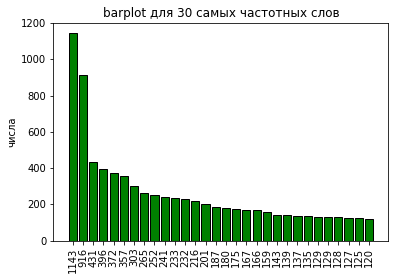

In [22]:
#Эти слова должны быть по оси Х в виде подписей к делениям. 
#Значениями по этой оси будет ряд чисел от 0 до 30.
cc = range(30)
xx = [word[1] for word in sorted_counts2]
yy = [word[0] for word in sorted_counts2] 
plt.bar(cc, xx[:30], color ='green', edgecolor='black')
plt.title('barplot для 30 самых частотных слов')
plt.ylabel('числа')
plt.xticks(cc, xx[:30], rotation=90)
plt.show()